In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys 
sys.path.append('../../src')

In [4]:
import scanpy as sc

In [5]:
import sys
sys.path.append('/Users/koush/Projects/SpaceOracle/src/')
sys.path.append('/Users/koush/Projects/Banksy_py')
import celloracle as co

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [6]:
adata = sc.read_h5ad('/Users/koush/Desktop/training_data/mouse_brain_wt_slideseq.h5ad')
adata

AnnData object with n_obs × n_vars = 23409 × 3311
    obs: 'cell_type', 'cell_type_int', 'seurat_clusters', 'umap_1', 'umap_2', 'author_cell_type'
    uns: 'cell_thresholds', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_umap', 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

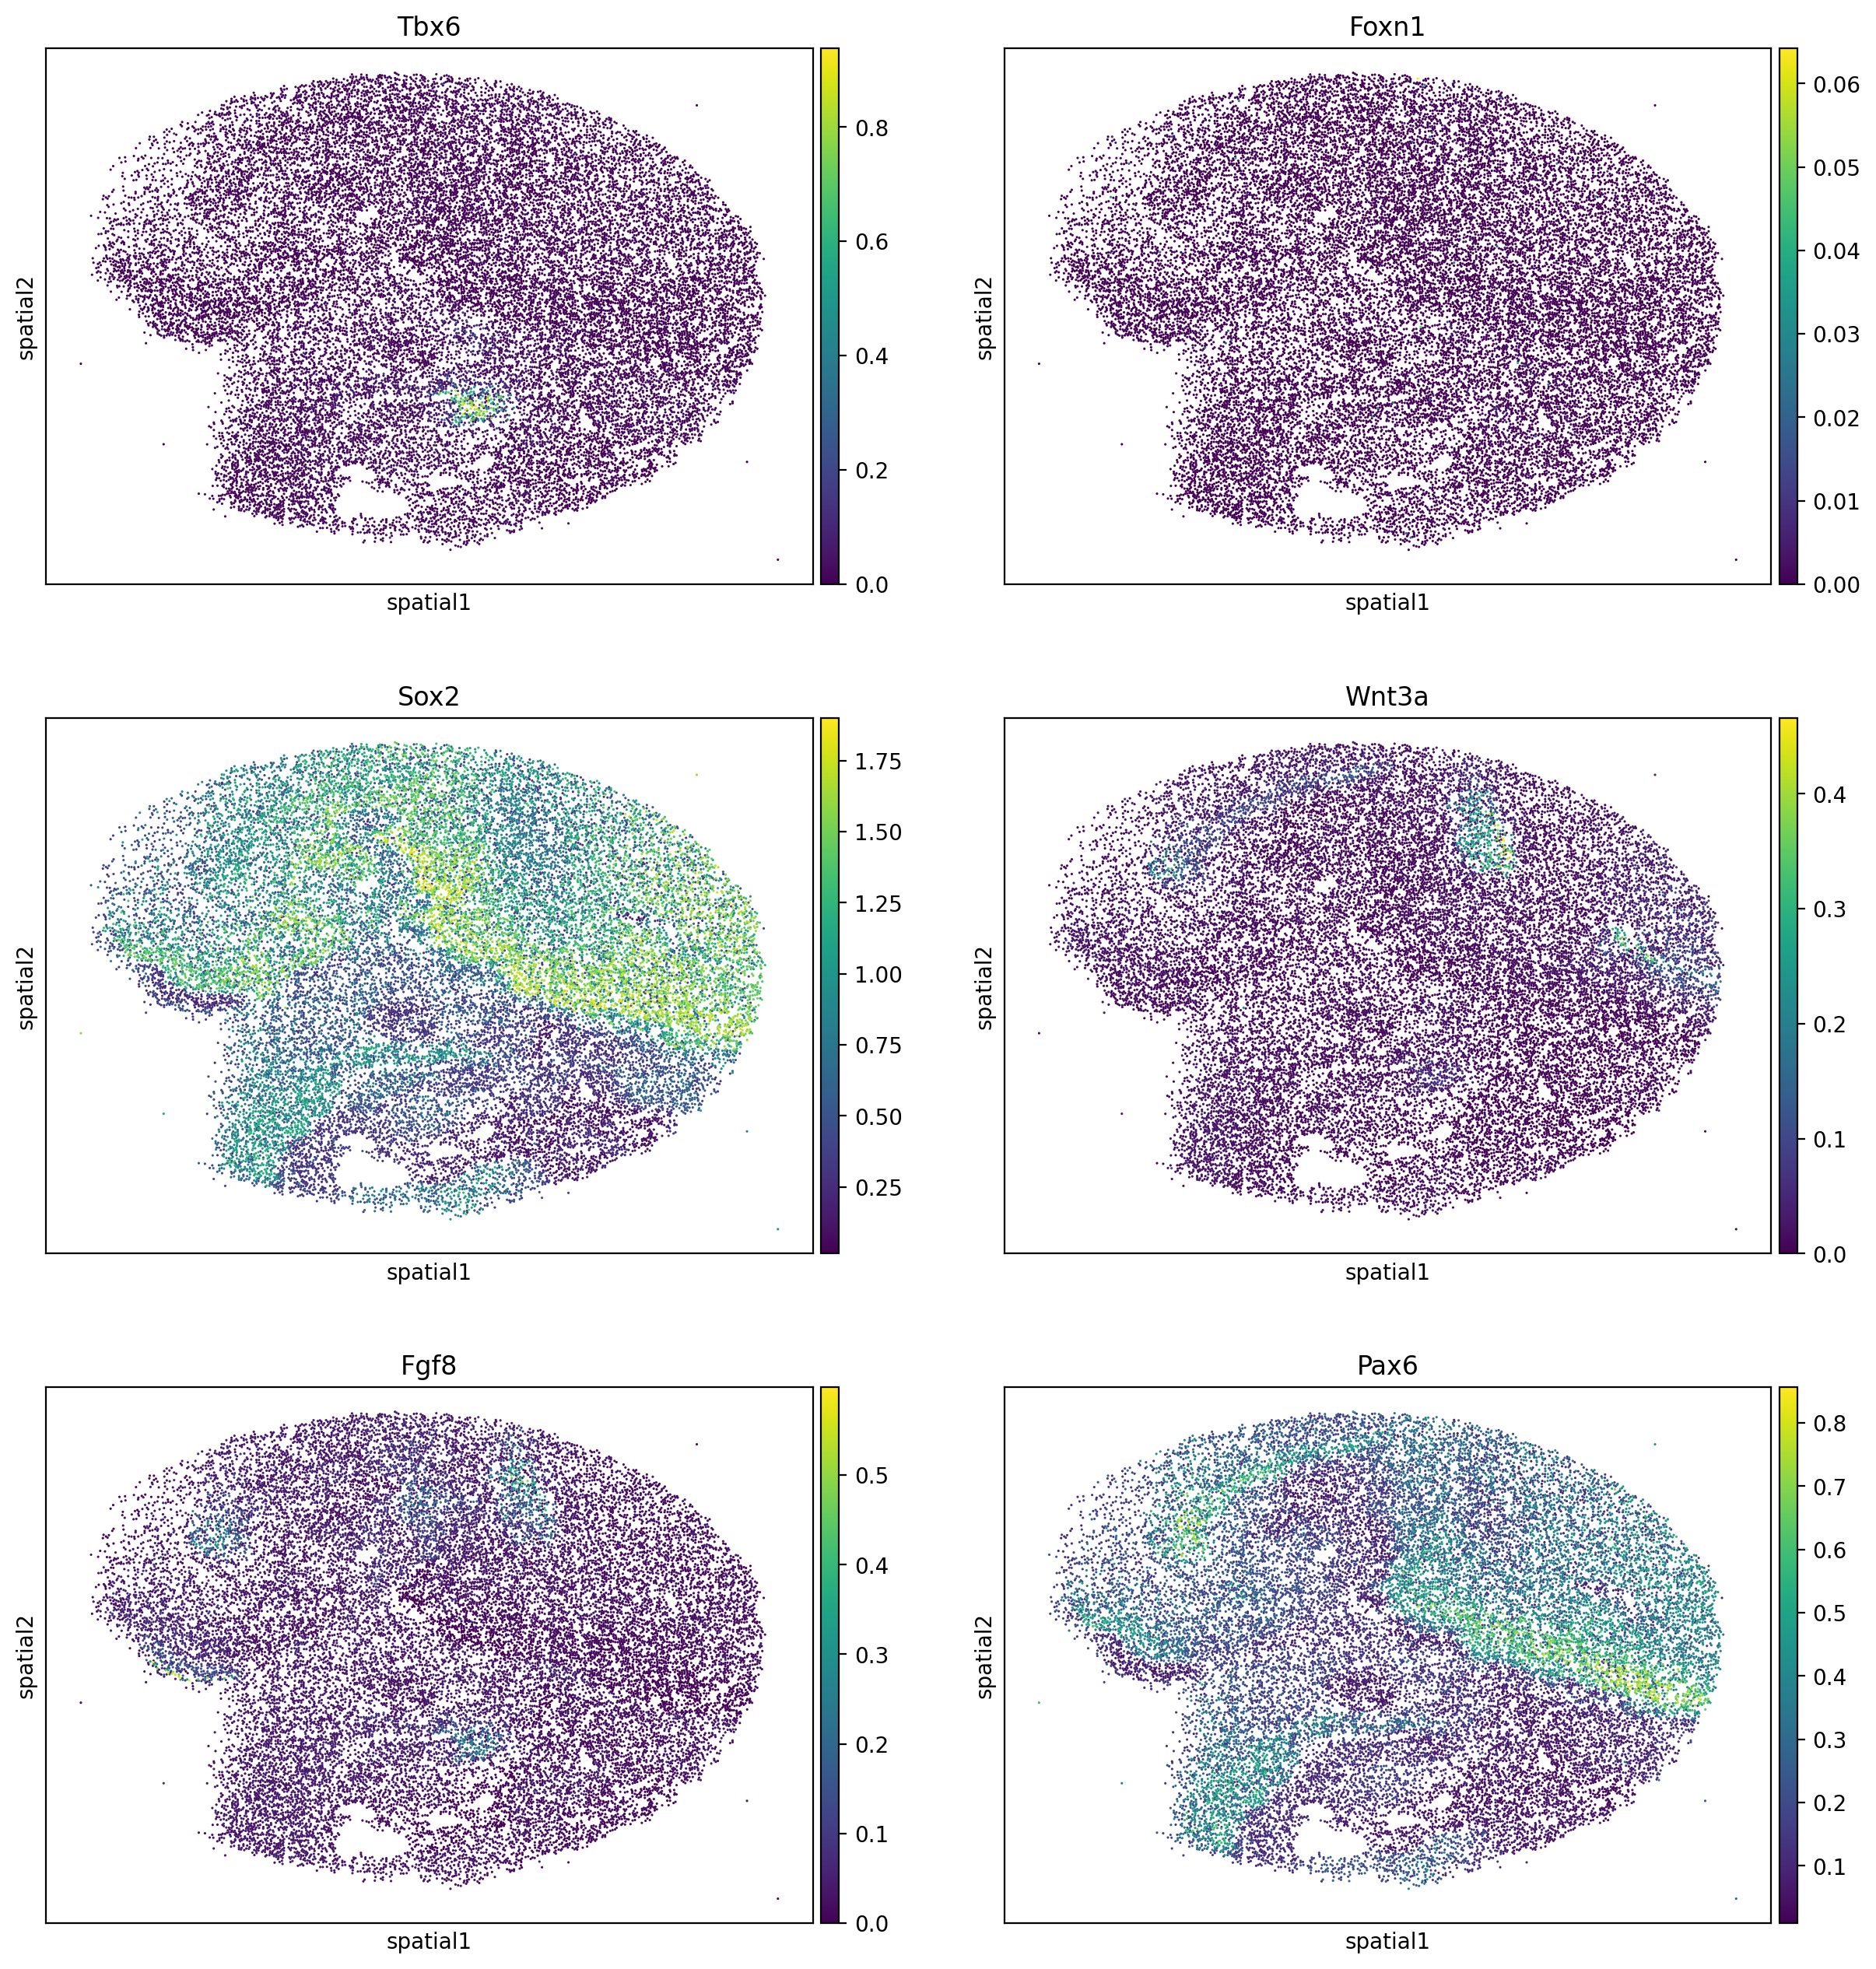

In [21]:
sc.pl.embedding(adata, 
        basis='spatial', ncols=2,
        color=['Tbx6', 'Foxn1', 'Sox2', 'Wnt3a', 'Fgf8', 'Pax6'], layer='imputed_count')
plt.show()

In [7]:
adata.to_df(layer='imputed_count').values.max()

5.029922075676621

In [10]:
%matplotlib inline

In [8]:
from spaceoracle.tools.network import RegulatoryFactory
co_grn = RegulatoryFactory(
    colinks_path='/Users/koush/Desktop/training_data/mouse_brain_wt_slideseq_colinks.pkl',
    annot='cell_type_int'
)

In [9]:
from spaceoracle.models.parallel_estimators import SpatialCellularProgramsEstimator

estimator = SpatialCellularProgramsEstimator(
    adata, 
    target_gene='Tbx6', 
    cluster_annot='cell_type_int',
    radius=200, 
    contact_distance=30,
    grn=co_grn,
)

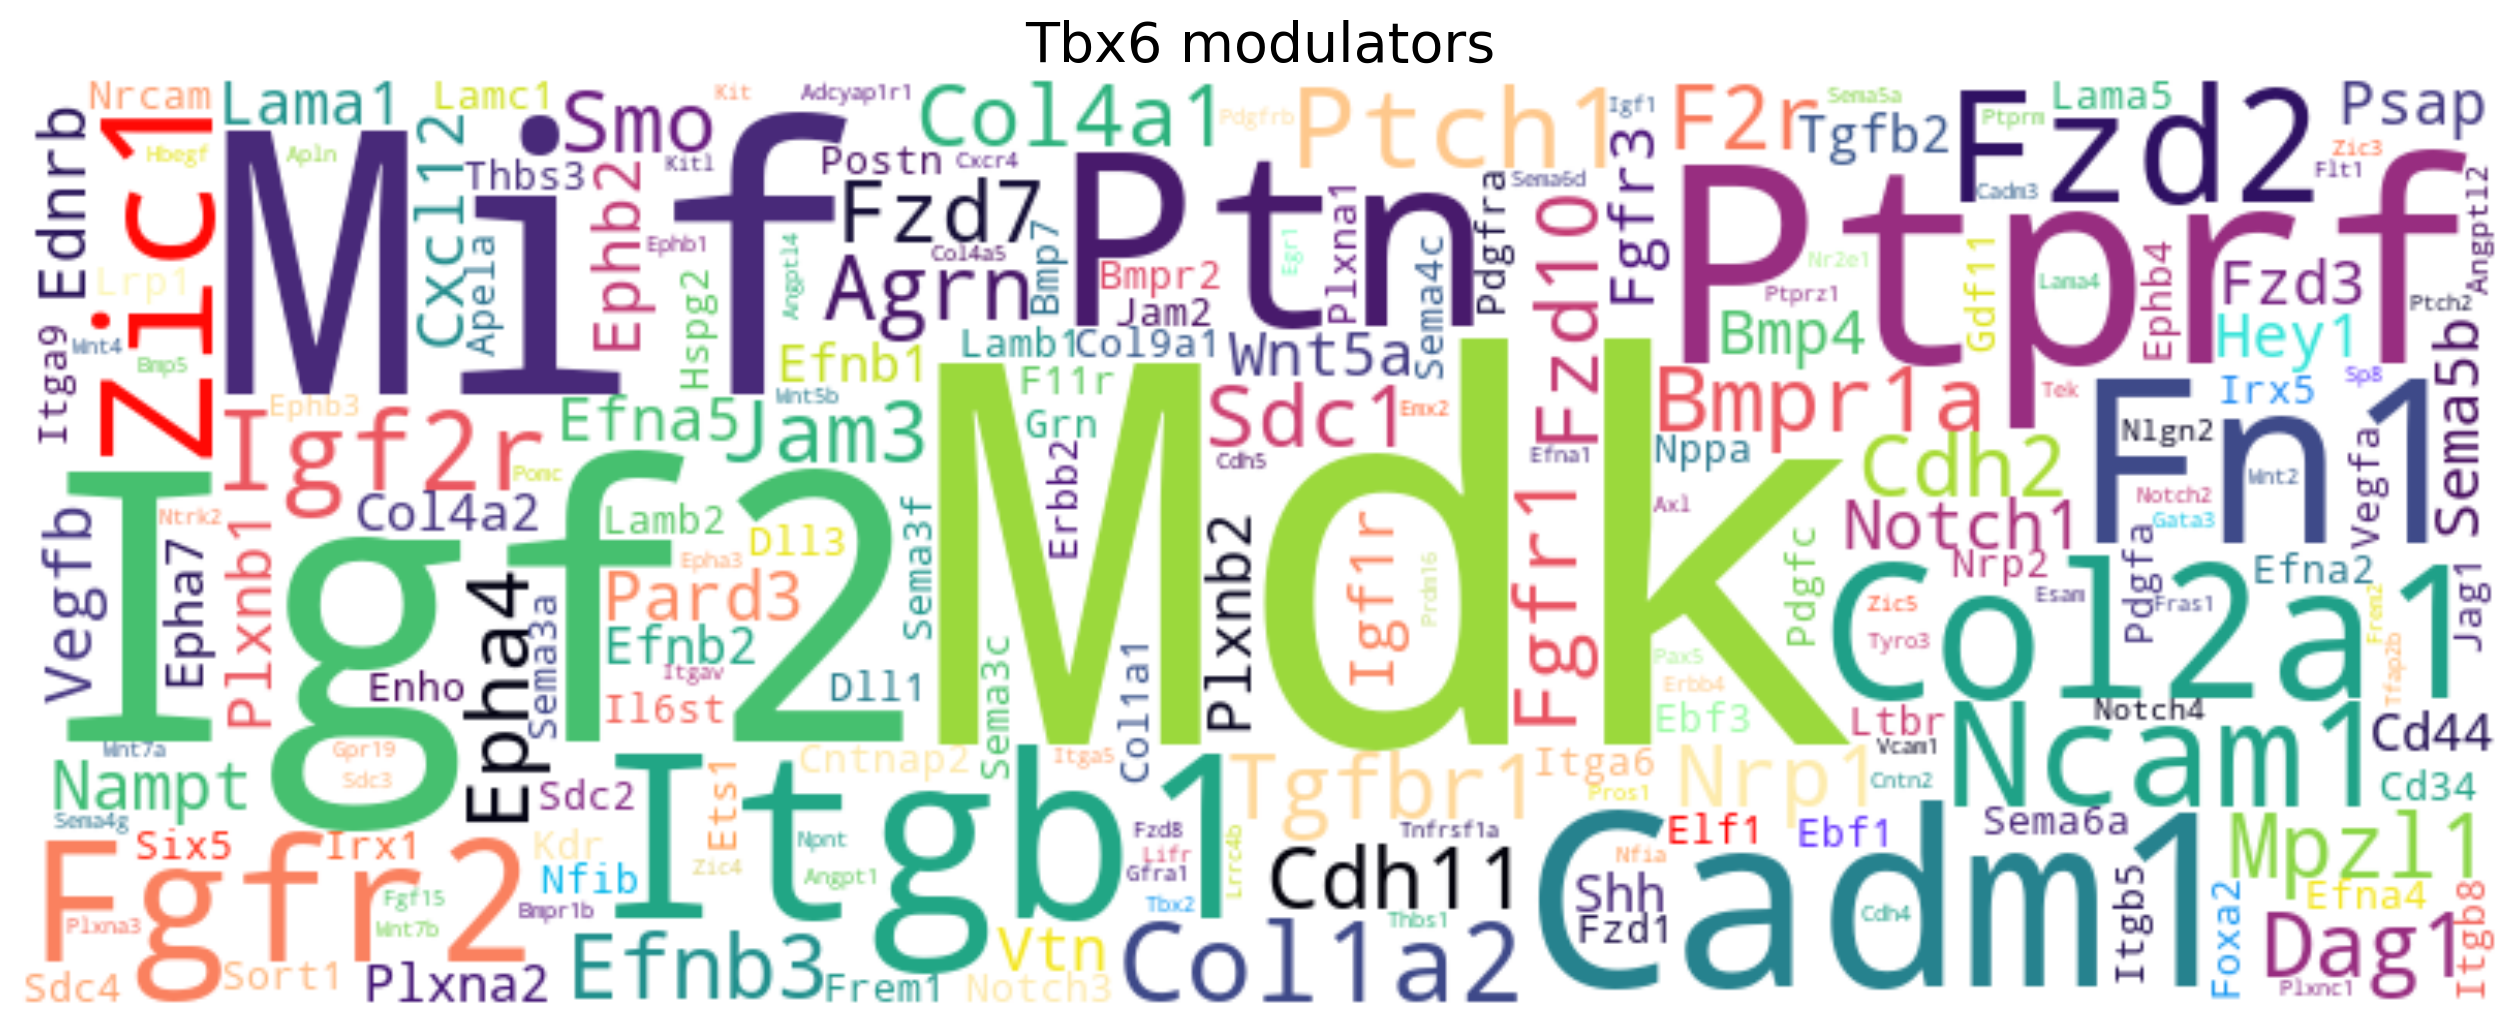

In [10]:
estimator.plot_modulators()

In [20]:
estimator.fit(num_epochs=50, learning_rate=5e-3, 
    score_threshold=0.2, l1_reg=1e-9, estimator='lasso')

Fitting Tbx6 with 1114 modulators
	37 Transcription Factors
	987 Ligand-Receptor Pairs
	90 TranscriptionFactor-Ligand Pairs
0: 0.9074 | 0.9019
1: 0.8287 | 0.8284
2: 0.9893 | 0.9714
3: 0.3359 | 0.2079
4: 0.8650 | 0.8238
5: 0.5277 | 0.3444
6: 0.8443 | 0.7687
7: 0.6342 | 0.4655
8: 0.9675 | 0.9666
9: 0.8943 | 0.6215
10: 0.8598 | 0.7013
11: 0.9819 | 0.9802
12: 0.5752 | 0.3992
13: 0.9554 | 0.8757


In [21]:
betadata = estimator.betadata

In [40]:
adata.obs[['cell_type_int', 'cell_type']].drop_duplicates()

cell_type_int                     cell_type
201112_04_CATCATTAATGGGA             0         Amnion mesoderm early
201112_04_TCTTGACCAAGGGC             7                   Neural tube
201112_04_CCCGMSTTCCAAGG             4                         Heart
201112_04_CAGAGAHAAAGCGA             2                   Angioblasts
201112_04_ACGACTTGAGTATT             3                         Brain
201112_04_GCCGTCCAGCCGCT            12   Secondary heart field (SHF)
201112_04_CCATCTATCAGCCA            13                       Somites
201112_04_GCCCGCTTAGCCCG            10          Preplacodal ectoderm
201112_04_CGTAGGGACATAAC             8  Neuromesodermal Progenitors 
201112_04_CGACCTTCAACAGC             9               Pharyngeal arch
201112_04_CAAATGGCCGACTT            11     Presomitic mesoderm (PSM)
201112_04_ACAMAACGTGACGA             6                  Neural crest
201112_04_ACAAGACGCTCGGC             5                    Mesenchyme
201112_04_TACCGCAACTTCTC             1          Amnion mesoderm late

In [42]:
pd.DataFrame({f'cluster_{i}': estimator.models[i].anchors.cpu().numpy()[1:] 
    for i in range(len(estimator.models))}, index=estimator.modulators)['cluster_3'].loc[
        estimator.lr_pairs.values].sort_values(
        ascending=False, key=abs).head(10)

Mdk$Itgb1     0.009205
Mdk$Sdc1      0.007368
Mif$Cd44     -0.003617
Mdk$Sdc2      0.002488
Igf2$Igf1r    0.002447
Mdk$Lrp1      0.002084
Ptn$Sdc1      0.002075
Igf2$Itgav    0.001279
Mdk$Sdc4      0.001089
Mdk$Itga6     0.001057
Name: cluster_3, dtype: float32

In [90]:
estimator.regulators

['Ar',
 'Atoh1',
 'Ebf1',
 'Ebf3',
 'Egr1',
 'Elf1',
 'Emx1',
 'Emx2',
 'Ets1',
 'Foxa2',
 'Gata3',
 'Hey1',
 'Irx1',
 'Irx4',
 'Irx5',
 'Irx6',
 'Nfia',
 'Nfib',
 'Nr2e1',
 'Pax5',
 'Pou6f2',
 'Prdm16',
 'Rxrg',
 'Six5',
 'Sp6',
 'Sp8',
 'Tbx2',
 'Tfap2a',
 'Tfap2b',
 'Tfap2c',
 'Tfap2e',
 'Zbtb7b',
 'Zfp82',
 'Zic1',
 'Zic3',
 'Zic4',
 'Zic5']

In [59]:
from spaceoracle.plotting.cartography import xy_from_adata


xy = xy_from_adata(estimator.adata)

In [95]:
data.cell_type_int.unique()

[7, 13, 6]
Categories (14, int64): [0, 1, 2, 3, ..., 10, 11, 12, 13]

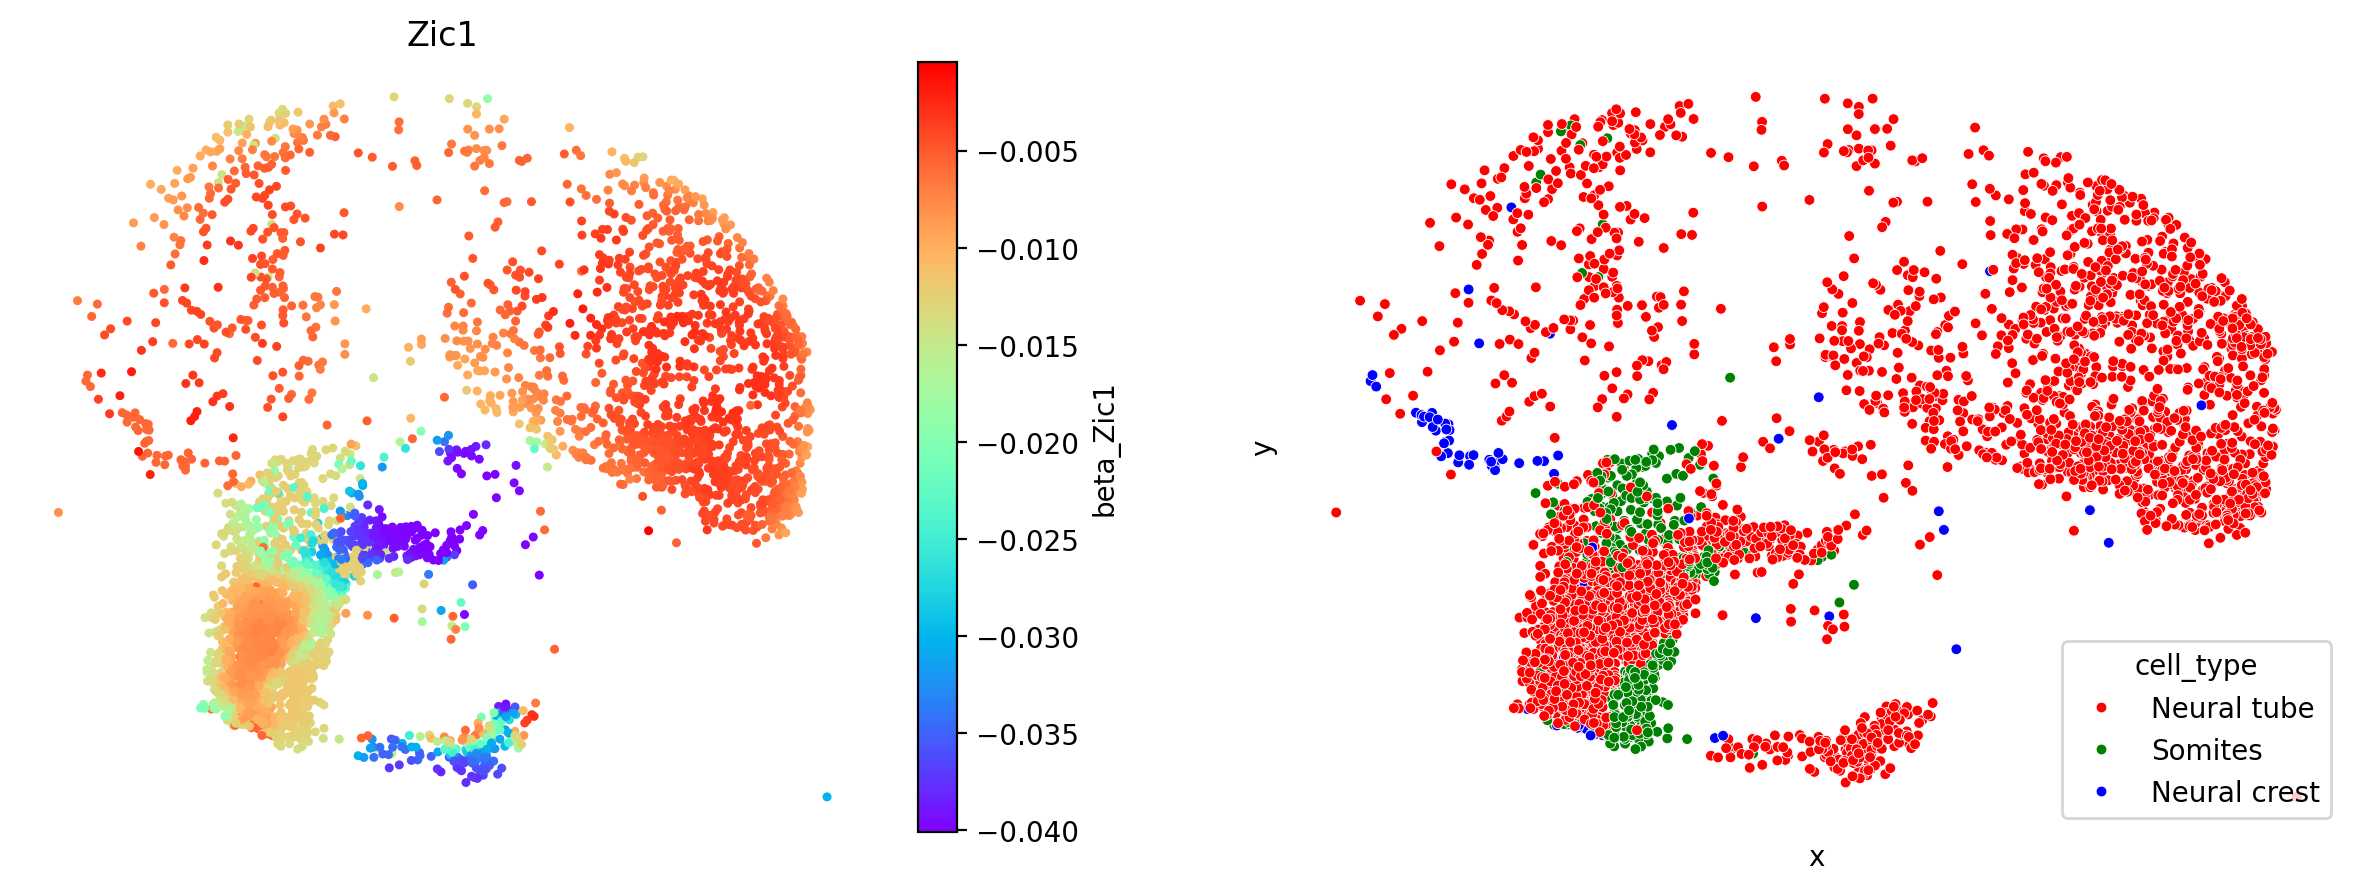

In [111]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
cmap = 'rainbow'
selected = 'Zic1'
data = betadata.join(estimator.adata.obs[['cell_type_int', 'cell_type']]).join(xy).query('cell_type_int.isin([7, 6, 13])')[
    ['x', 'y', f'beta_{selected}', 'cell_type']].join(estimator.train_df[[f'{selected}']])

data.cell_type = data.cell_type.astype(str)

scatter1 = ax[0].scatter(
    data['x'],
    data['y'], 
    c=data[f'beta_{selected}'],
    s=5,
    cmap=cmap
)
f.colorbar(scatter1, ax=ax[0], label=f'beta_{selected}')

scatter2 = sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='cell_type',
    s=15,
    legend=True,
    palette=['red', 'green', 'blue'],
    ax=ax[1],
)

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    for spine in ['top', 'right', 'left', 'bottom']:
        a.spines[spine].set_visible(False)
        
ax[0].set_title(selected)
plt.show()

In [103]:
betadata[[i for i in betadata.columns if 'Shh' in i]].mean()

beta_Shh$Ptch1   -1.841244e-04
beta_Shh$Smo     -5.401439e-05
beta_Shh$Ptch2    1.224366e-05
beta_Shh#Zic1     8.865427e-07
dtype: float32